In [7]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

In [8]:
df =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis (EDA)

In [9]:
# Checking shape of dataset
df.shape

(1599, 12)

In [10]:
# Checking no. of unique categories in target column
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [11]:
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Above dataset contains only numerical columns. Total number of columns is 12, out of which 1 is target column.
quality is our target column. quality is divided into 6 type (3, 4, 5, 6, 7, 8), so it is classification problem

In [12]:
# Checking data distribution in target column
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Data is not uniformily distributed among all the categories of target variable. So we have to balance the data.

In [13]:
# Checking Statistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above summary below is the observation:
1. Total no. of records is 1599
2. No null values present in any of the column (But we have to check for white spaces or any other value other than numbers)
3. Outliers are present in the dataset. We have to detect it.

In [14]:
# Checking datatypes of columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the data types are either float64 or int64. There is no need of data typecast

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# Checking count of each column

for i in df:
    print(df[i].value_counts())
    print('\n')

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64


volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64


citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64


residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64


chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64


free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12

From above summary it is clear that no column contains white spaces

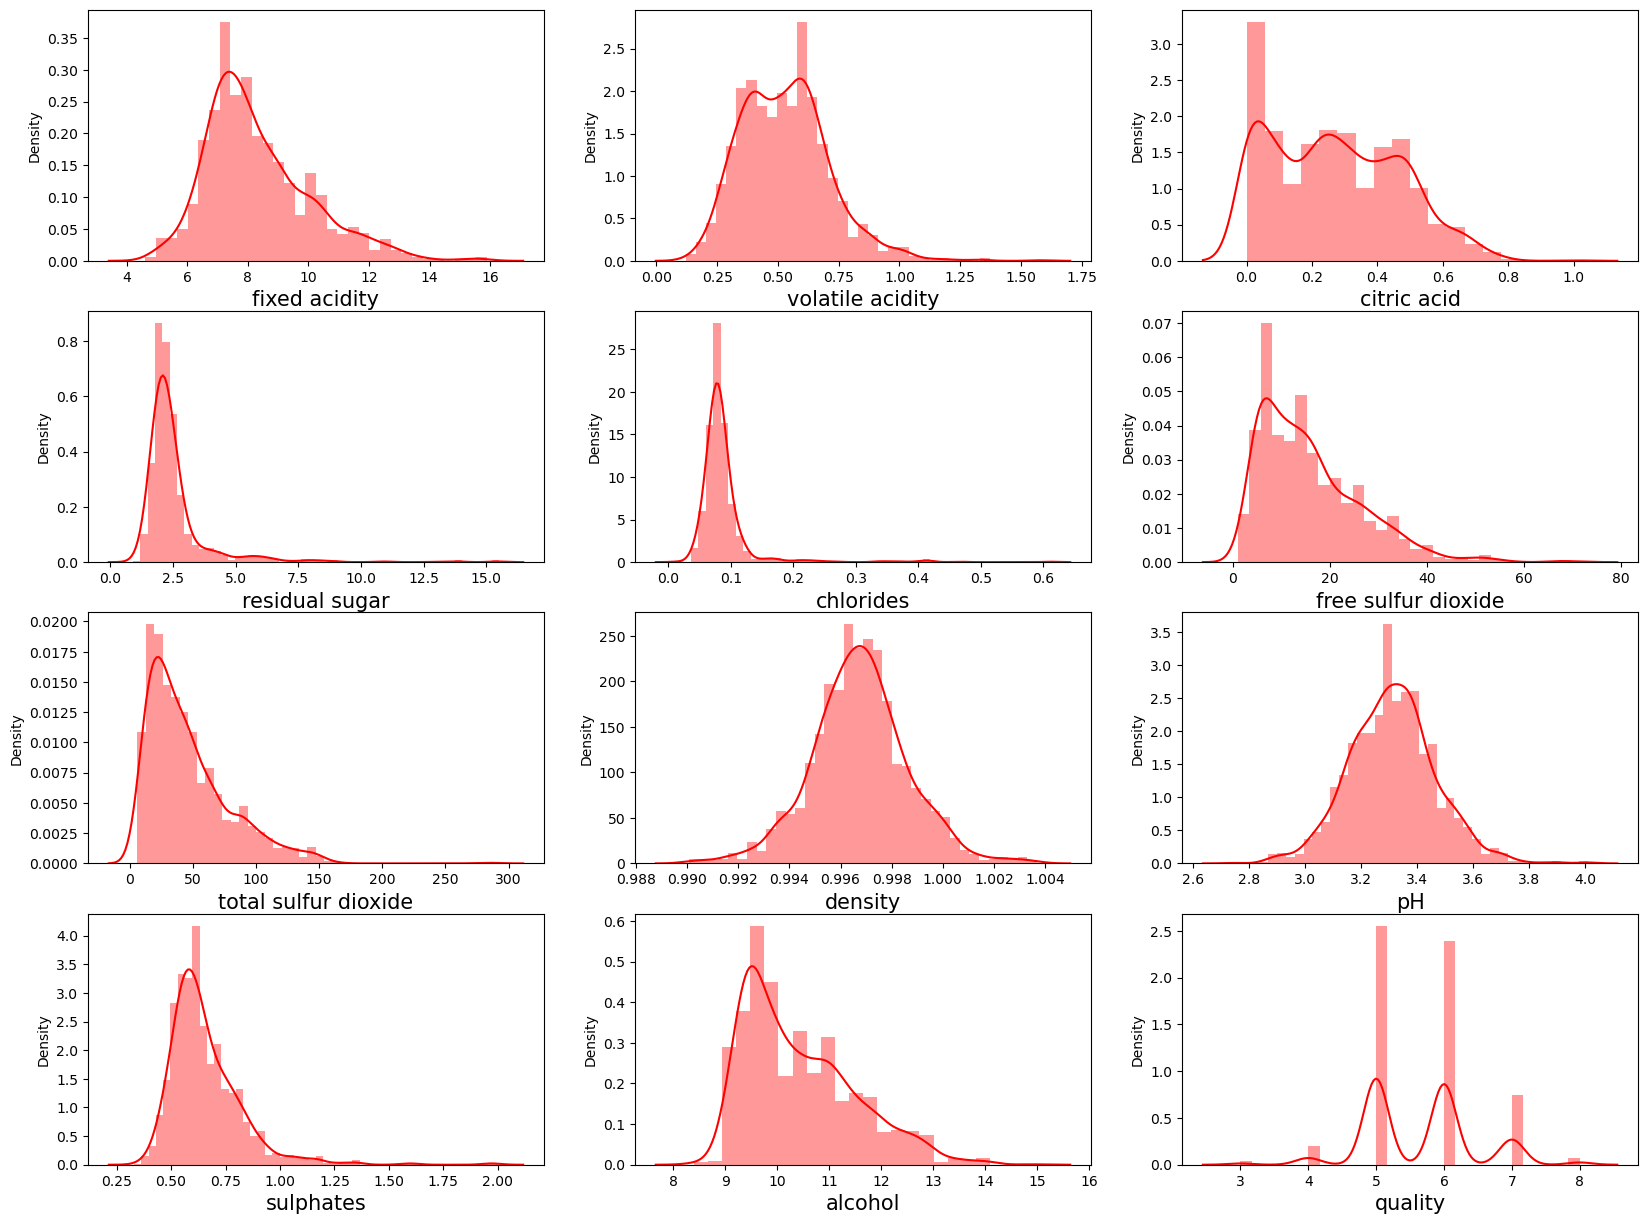

In [18]:
# Let's check data distribution in columns

plt.figure(figsize =(20, 15))
plotnumber =1

for column in df:
    if plotnumber<=12:
        ax =plt.subplot(4,3, plotnumber)
        sns.distplot(df[column], color ='r')
        plt.xlabel(column, fontsize =15)
                
    plotnumber+=1
plt.show()

From above graph, we can see that skewness is present in data. Lets check and fix it

In [19]:
#Check correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


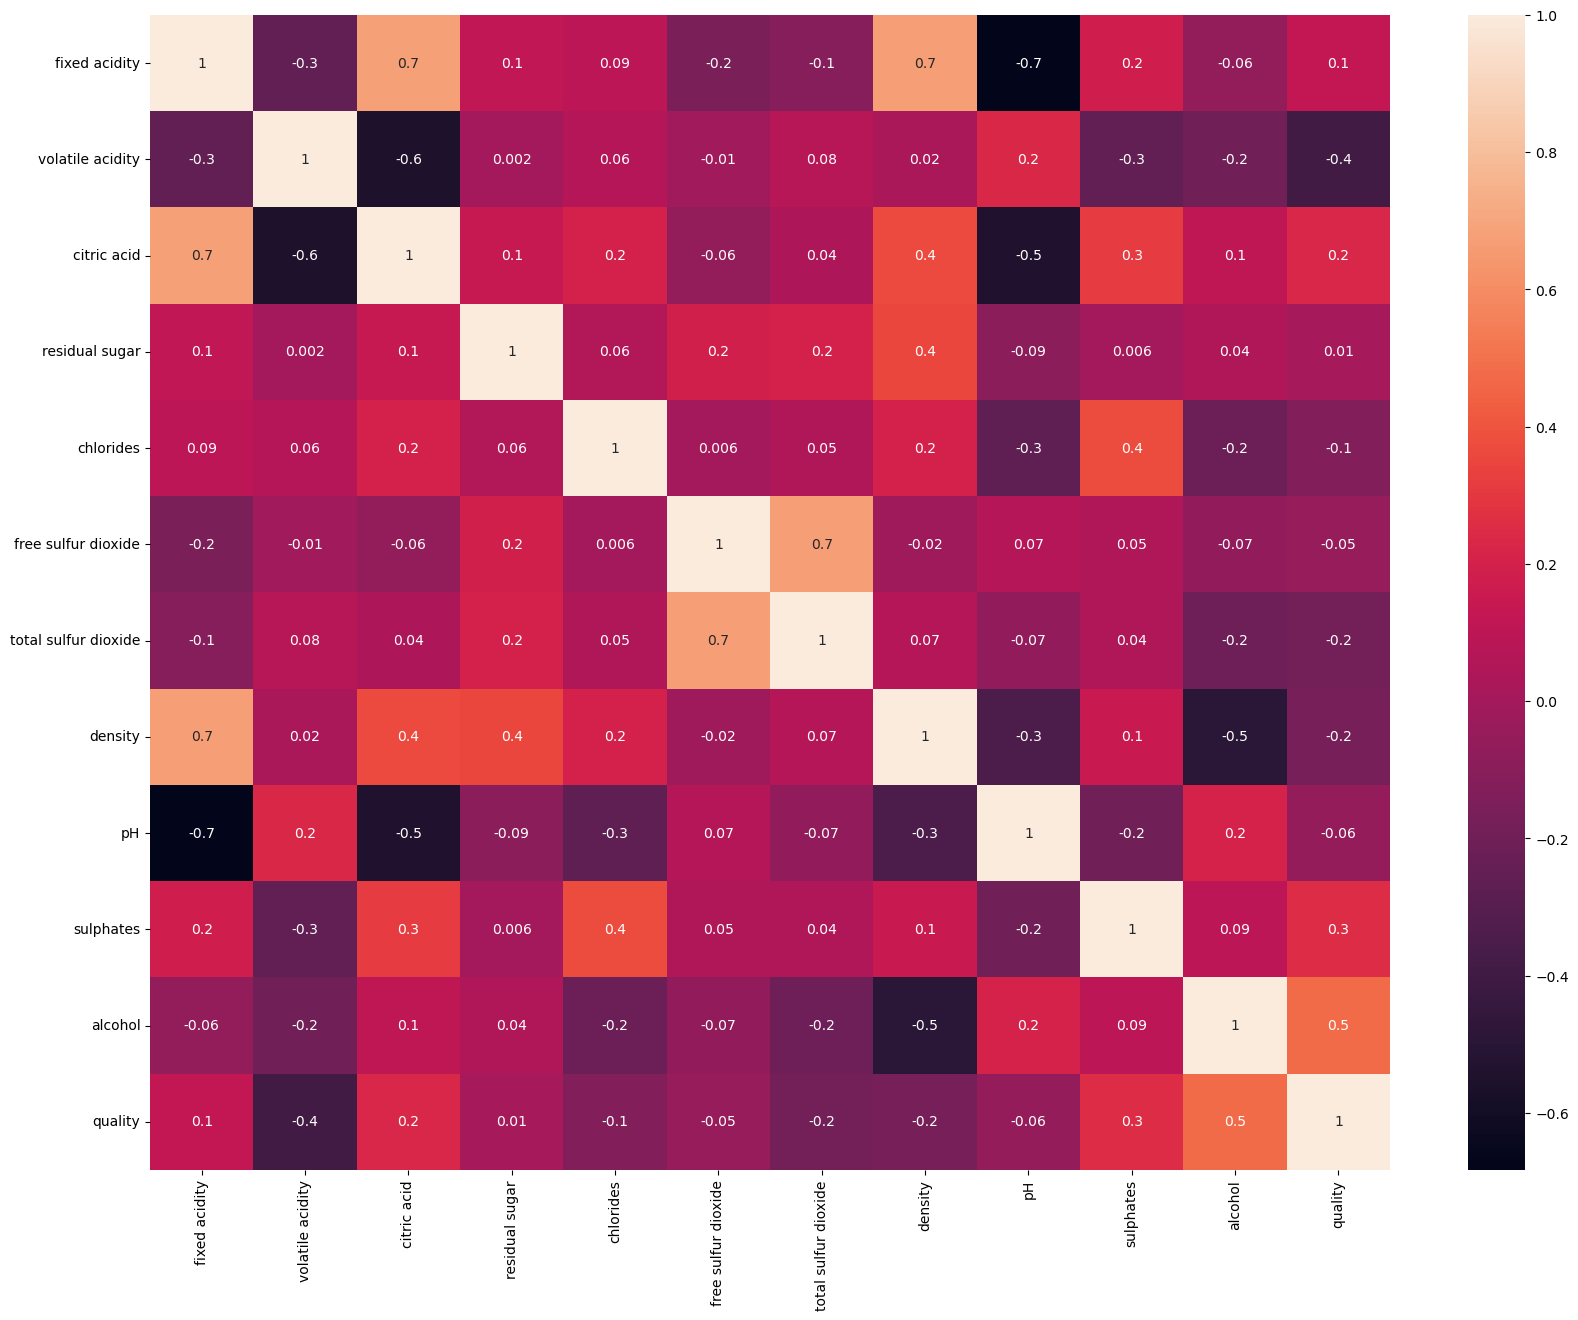

In [20]:
# plotting heatmap
plt.figure(figsize =(20,15))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

From above heatmap, seem there is multicollinearity between below features:
1. fixed acidity -- citric acid
2. fixed acidity -- density
3. free sulfur dioxide -- total sulfur dioxide

Lets verify it using scatterplot

<Axes: xlabel='fixed acidity', ylabel='citric acid'>

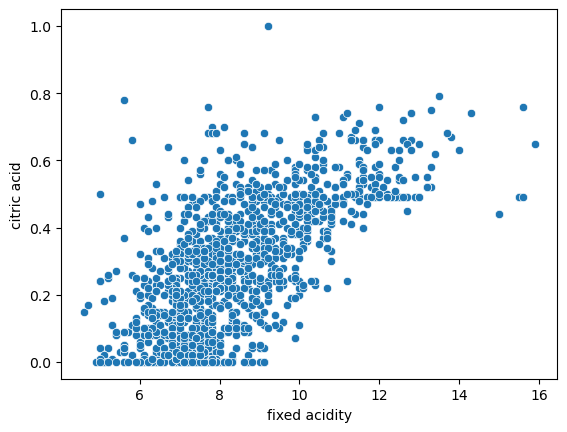

In [21]:
sns.scatterplot(x ='fixed acidity', y ='citric acid', data =df)

<Axes: xlabel='fixed acidity', ylabel='density'>

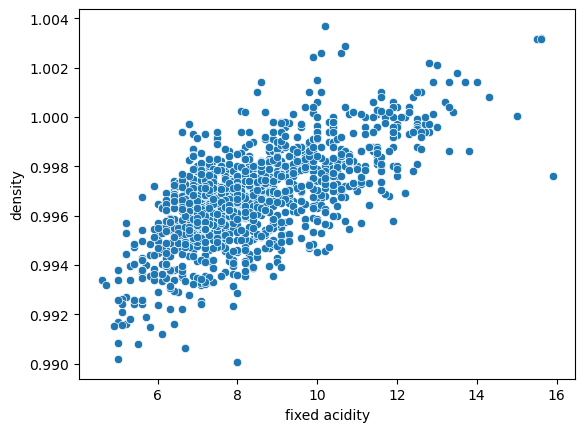

In [22]:
sns.scatterplot(x ='fixed acidity', y ='density', data =df)

<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

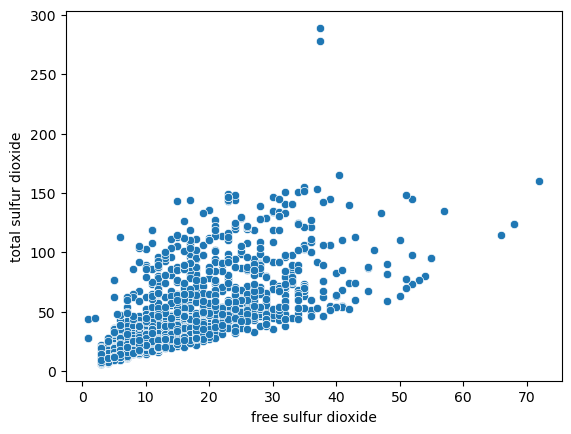

In [23]:
sns.scatterplot(x ='free sulfur dioxide', y ='total sulfur dioxide', data =df)

In [24]:
# Find variance inflation factor in each columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif['VIF Values'] =[variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif["Features"] =df.columns
vif

,VIF Values,Features
0,74.455312,fixed acidity
1,17.960867,volatile acidity
2,9.192549,citric acid
3,4.664003,residual sugar
4,6.641291,chlorides
5,6.460603,free sulfur dioxide
6,6.605274,total sulfur dioxide
7,1528.154302,density
8,1078.171089,pH
9,22.462103,sulphates


From the above graph and VIF score we can conclude that there is multicollinearity between:
1. total sulfur dioxide and free sulfur dioxide

we drop keep drop the features which have less correlation with the label
We will drop 'free sulphar dioxide'

In [25]:
# Droping columns
df.drop(columns =['free sulfur dioxide'], inplace =True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


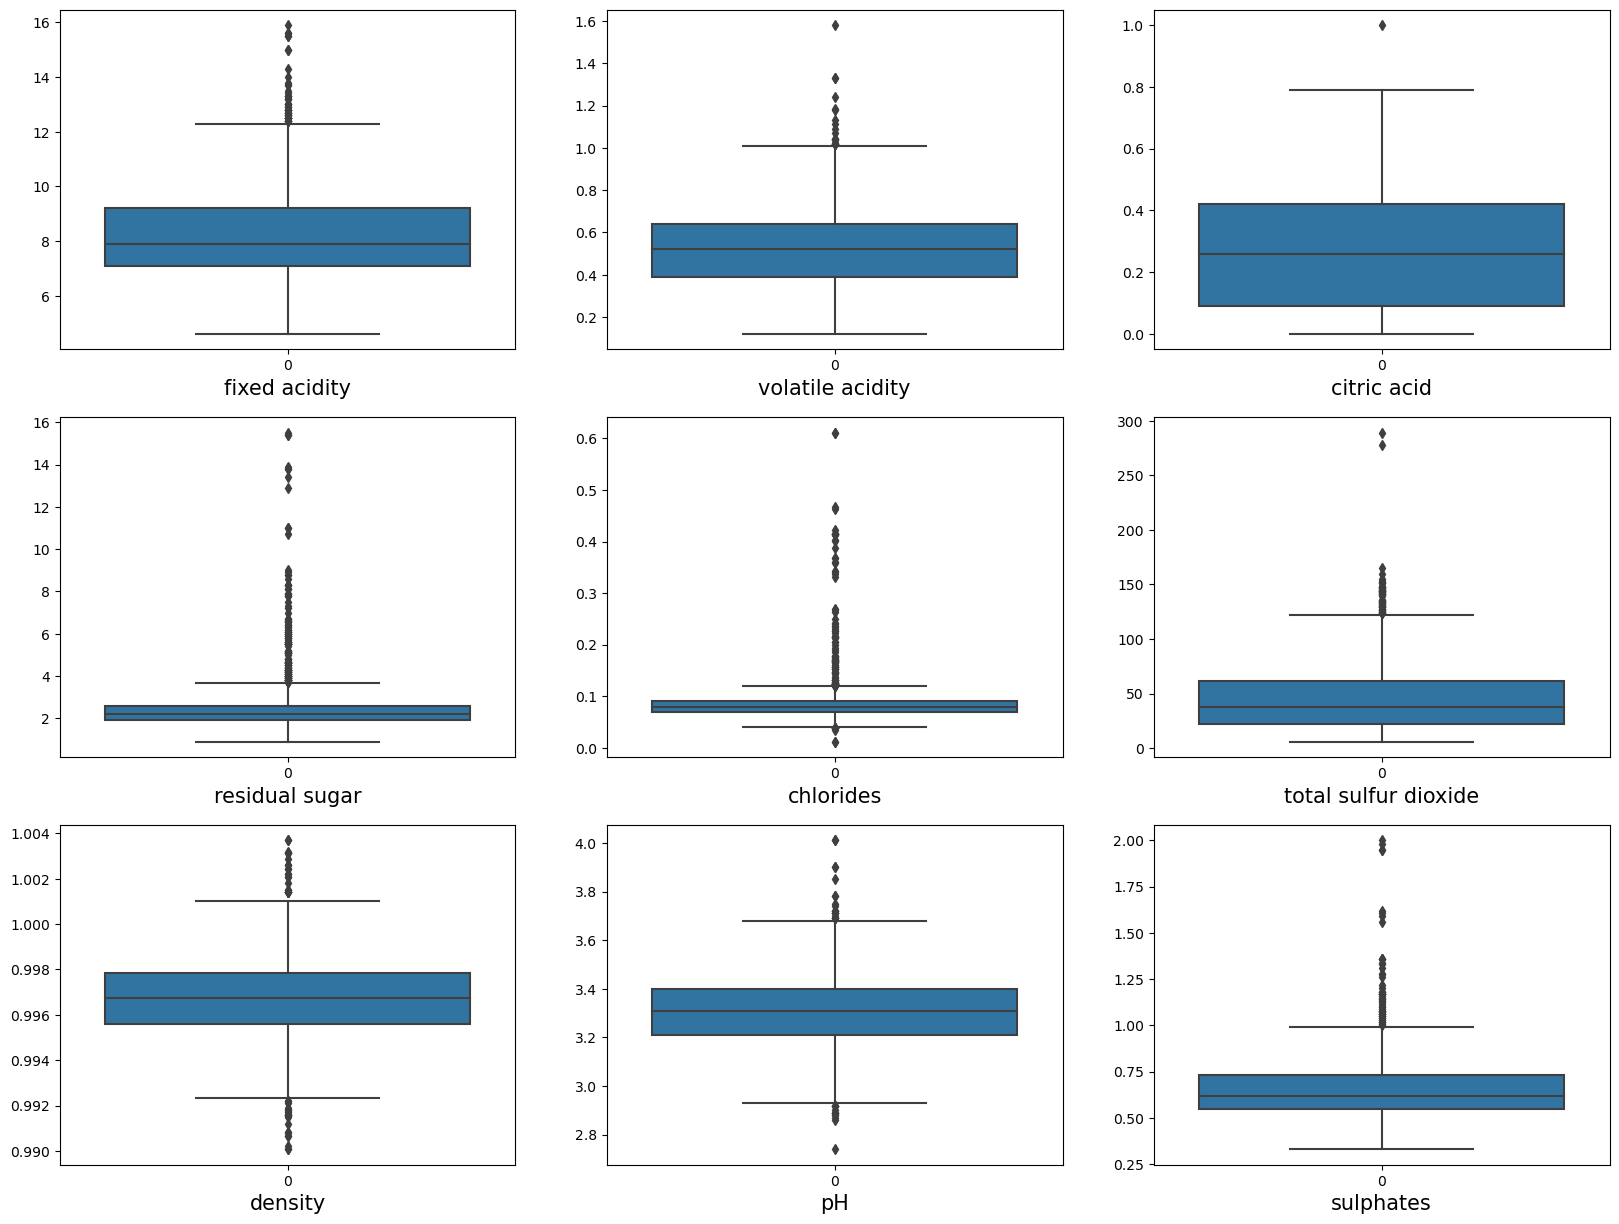

In [27]:
# Checking outliers using boxplot
plt.figure(figsize =(20,15), facecolor ='white')
plotnumber =1

for column in df:
    if plotnumber <=9:
        ax =plt.subplot(3,3, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize =15)
        
    plotnumber+=1
plt.show()


From the above boxplot is it clear that outlier are present in dataset

In [28]:
# Removing outliers using zscore

outlier_features =df.drop('quality',axis =1)
z =np.abs(zscore(outlier_features))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,0.075043,0.676657,1.677400,0.305990,0.209308


In [29]:
np.where(z>3)

(array([  13,   15,   17,   17,   19,   33,   38,   42,   43,   45,   81,
          81,   83,   86,   88,   91,   92,   95,  106,  106,  109,  120,
         126,  127,  142,  144,  147,  151,  151,  151,  151,  163,  164,
         169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
         274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
         391,  396,  400,  442,  442,  451,  467,  480,  480,  494,  515,
         544,  554,  554,  555,  555,  557,  557,  568,  588,  591,  595,
         608,  614,  636,  639,  649,  649,  651,  652,  652,  652,  672,
         672,  684,  690,  692,  692,  695,  723,  724,  730,  754,  776,
         777,  795,  821,  836,  837,  889,  911,  917,  923, 1017, 1018,
        1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114,
        1165, 1186, 1235, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
        1289, 1299, 1300, 1312, 1316, 1319, 1319, 1321, 1367, 1370, 1370,
        1372, 1372, 1374, 1434, 1434, 

In [30]:
# Removing outliers from dataset and creating new dataframe
df1 =df[(z<3).all(axis =1)]
df1.shape

(1471, 11)

In [31]:
# Checking Data loss
print("Shape of old dataset :", df.shape[0])
print("Shape of new dataset: ", df1.shape[0])

print("Data Loss after outlier deletion: ", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Shape of old dataset : 1599
Shape of new dataset:  1471
Data Loss after outlier deletion:  8.005003126954346


In [32]:
# Checking skewness in dataset
df1.skew()

fixed acidity           0.823729
volatile acidity        0.380186
citric acid             0.295512
residual sugar          2.413361
chlorides               2.296968
total sulfur dioxide    1.169441
density                 0.057944
pH                      0.116405
sulphates               0.877476
alcohol                 0.757992
quality                 0.252452
dtype: float64

Skewness is present in fixed acidity, residual sugar, chlorides, total sulfur dioxide, suplphates and alcohol.

In [33]:
# Removing skewness
df1['fixed acidity'] =np.cbrt(df1['fixed acidity'])
df1['residual sugar'] =np.cbrt(df1['residual sugar'])
df1['chlorides'] =np.cbrt(df1['chlorides'])
df1['total sulfur dioxide'] =np.cbrt(df1['total sulfur dioxide'])
df1['sulphates'] =np.cbrt(df1['sulphates'])
df1['alcohol'] =np.cbrt(df1['alcohol'])

In [34]:
# AgaIng checking skewness in the dataset
df1.skew()

fixed acidity           0.530808
volatile acidity        0.380186
citric acid             0.295512
residual sugar          1.613025
chlorides               1.065145
total sulfur dioxide    0.333041
density                 0.057944
pH                      0.116405
sulphates               0.513550
alcohol                 0.644458
quality                 0.252452
dtype: float64

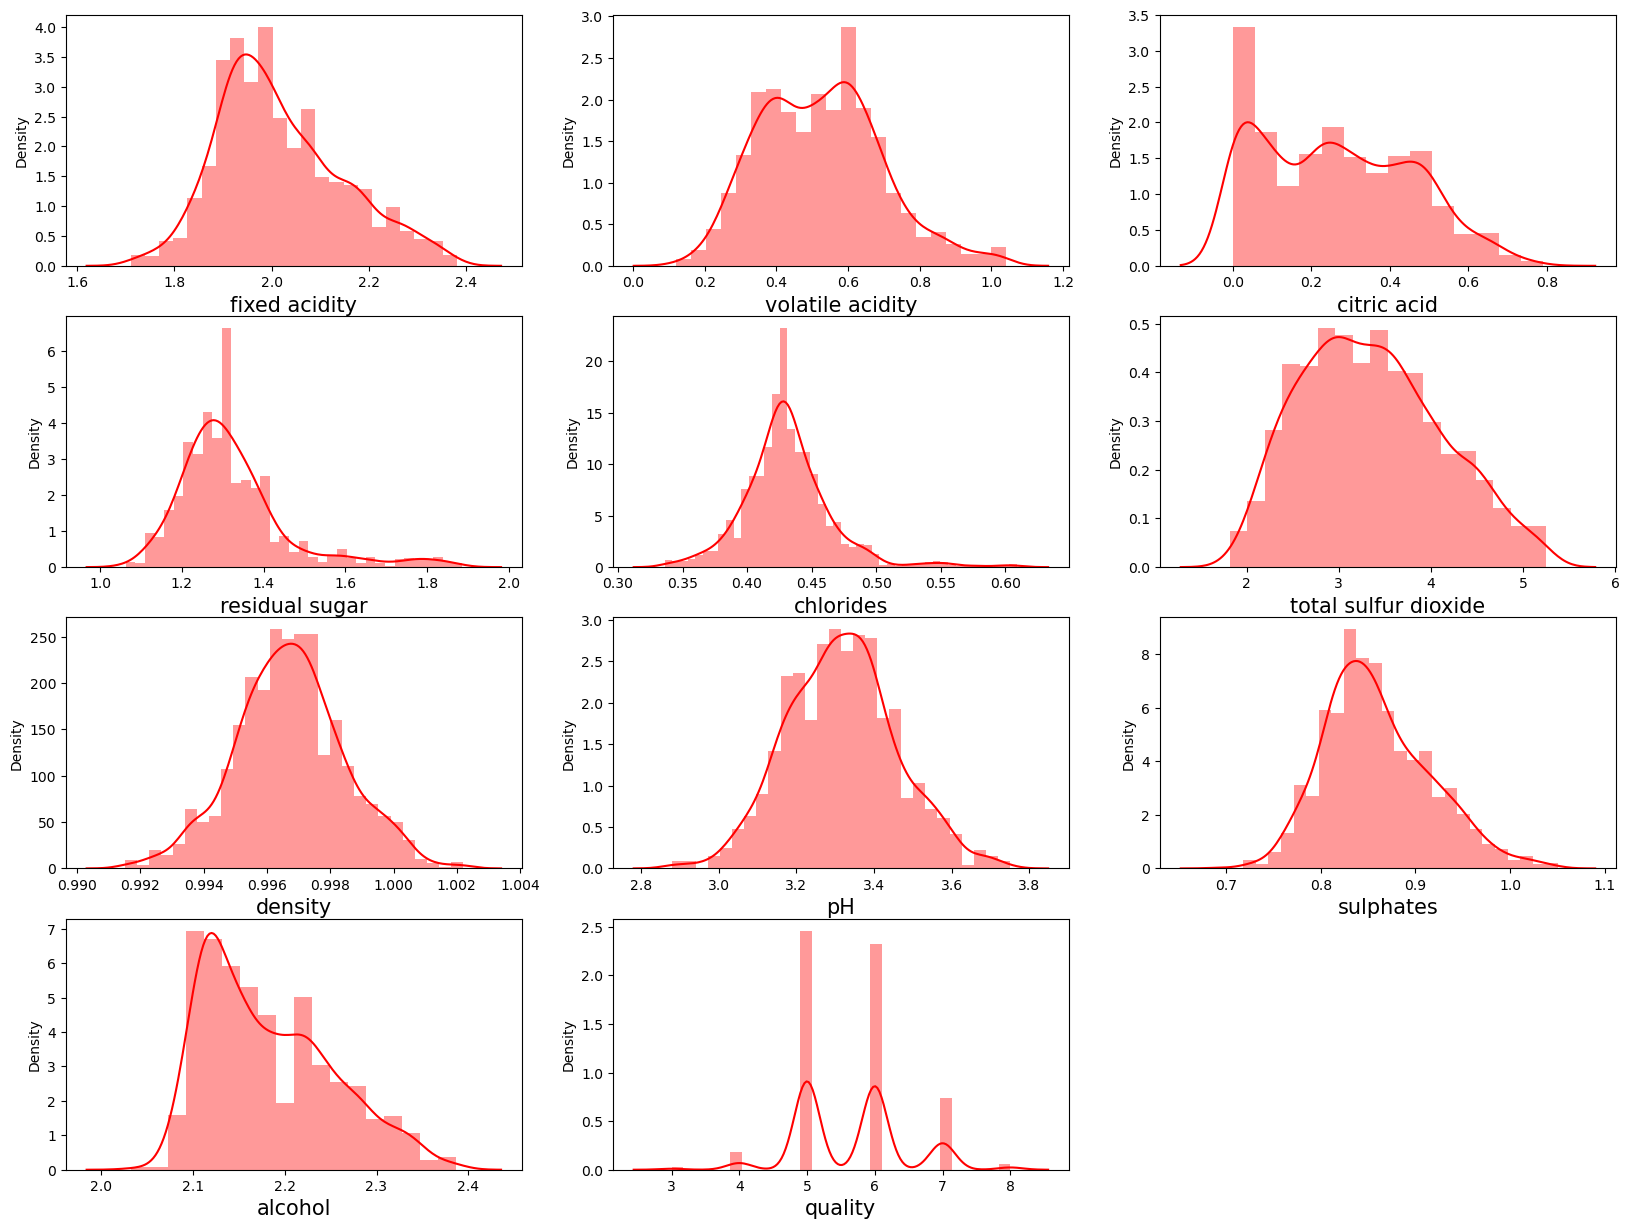

In [35]:
# Let's check again data distribution in columns

plt.figure(figsize =(20, 15))
plotnumber =1

for column in df1:
    if plotnumber<=12:
        ax =plt.subplot(4,3, plotnumber)
        sns.distplot(df1[column], color ='r')
        plt.xlabel(column, fontsize =15)
                
    plotnumber+=1
plt.show()

In [36]:
# Divide the data into feature and label

# Selecting Features
x =df1.drop('quality', axis =1)
y =df1['quality']

In [37]:
# Data standardization using Standard Scaler
scaler =StandardScaler()
scaler.fit(x)

StandardScaler()

In [38]:
# Oversampling the data
SM =SMOTE()
x1, y1=SM.fit_resample(x, y)

In [39]:
# Checking shape of featues and label
print("Shape of Features: ", x1.shape)
print("Shape of Label :", y1.shape)

Shape of Features:  (3744, 10)
Shape of Label : (3744,)


In [40]:
# Checking data distribution of label after balancing the data
y1.value_counts()

quality
5    624
6    624
7    624
4    624
8    624
3    624
Name: count, dtype: int64

### Model Building

### Find best random state

In [41]:
maxacc =0
maxrs =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x1, y1, test_size =0.3, random_state =i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred =RFR.predict(x_test)
    accuracy =accuracy_score(y_test, pred)
    
    if accuracy > maxacc:
        maxacc =accuracy
        maxrs =i
        
print("Maximum accuracy is ", maxacc, "at random state ", maxrs)

Maximum accuracy is  0.8976868327402135 at random state  38


In [42]:
x_train, x_test, y_train, y_test =train_test_split(x1, y1, test_size =0.3, random_state =maxrs)

In [43]:
RFC =RandomForestClassifier()
LR =LogisticRegression()
svc =SVC()
GB =GradientBoostingClassifier()
ADA =AdaBoostClassifier()
BC =BaggingClassifier()
ET =ExtraTreesClassifier()
DT =DecisionTreeClassifier()

In [44]:
models ={'LogisticRegression': LR,
       'RandomForesClassifier': RFR,
       'SVC': svc,
       'GradientBoostingClassifier': GB,
       'AdaBoosClassifier': ADA,
       'BaggingClassifier': BC,
       'ExtraTreesClassifier': ET,
       'DecisionTreesClassifier': DT}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred =model.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    print(name)
    print("\nAccuracy :", acc*100)
    print("Confusion Matrix :\n", confusion_matrix(y_test, pred))
    print("Classification Report :\n", classification_report(y_test, pred))
    
    # Cross Validation
    score =cross_val_score(model, x1, y1)
    print("\n\nModel Name (Cross Validation): ", model)
    print(score)
    print((score.mean())*100)
    print("Difference between accuracy score and cross validation score: ", (accuracy_score(y_test, pred)-score.mean())*100)
    print("\n")
    print("="*50)
    print('\n')
    

LogisticRegression

Accuracy : 54.092526690391466
Confusion Matrix :
 [[144  26   5   9   0   0]
 [ 29  82  51  19   3   2]
 [ 19  30  94  23   4   8]
 [ 10  25  50  39  29  32]
 [  4  23   9  20  82  67]
 [  0   0   9   5   5 167]]
Classification Report :
               precision    recall  f1-score   support

           3       0.70      0.78      0.74       184
           4       0.44      0.44      0.44       186
           5       0.43      0.53      0.47       178
           6       0.34      0.21      0.26       185
           7       0.67      0.40      0.50       205
           8       0.61      0.90      0.72       186

    accuracy                           0.54      1124
   macro avg       0.53      0.54      0.52      1124
weighted avg       0.53      0.54      0.52      1124



Model Name (Cross Validation):  LogisticRegression()
[0.52069426 0.52736983 0.55006676 0.53671562 0.48796791]
52.45628752775537
Difference between accuracy score and cross validation score:  1.6362

__We will choose ExtraTreesClassifier as the accuracy after cross validation is 82%, which is highest among all the classification models used.__

### Hyperparameter tunning

In [45]:
# Extra Trees Classifier

parameters ={'criterion': ['ginni', 'entropy'],
            'random_state': [20, 60, 100, 158, 348],
             'max_depth': [0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 150, 280]}

In [46]:
GCV =GridSearchCV(ExtraTreesClassifier(), parameters, cv =5)

In [47]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 150, 280],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [20, 60, 100, 158, 348]})

In [48]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 280,
 'n_jobs': -2,
 'random_state': 348}

In [52]:
Final_model =ExtraTreesClassifier(
 criterion= 'entropy',
 max_depth= 20,
 n_estimators= 280,
 n_jobs= -2,
 random_state= 348)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy is : ", acc*100)

Accuracy is :  88.61209964412812


In [54]:
# Saving the model
joblib.dump(Final_model, 'Red-Wine-Quality_Prediction.pkl')

['Red-Wine-Quality_Prediction.pkl']

### Predicting the saved model

In [55]:
# Loading the saved model
model =joblib.load('Red-Wine-Quality_Prediction.pkl')

# Predicting the model
prediction =model.predict(x_test)
prediction

array([4, 3, 6, ..., 6, 4, 6], dtype=int64)

### Comparing Actual Vs prediction

In [57]:
test =np.array(y_test)
df =pd.DataFrame()
df['Predicted'] =prediction
df['Actual'] =test
df.head(20)

,Predicted,Actual
0,4,4
1,3,3
2,6,6
3,4,4
4,7,7
5,8,8
6,8,8
7,6,6
8,7,7
9,3,3
